<a href="https://colab.research.google.com/github/aadvikk/it_incident_servicenow_analysis/blob/main/servicenow_it_incident_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT Incident & Service Desk Performance Analysis

## Business Objective
Analyze IT incident data to evaluate SLA compliance, resolution efficiency, and operational bottlenecks, simulating ServiceNow-based reporting used by enterprise IT teams.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

print("Libraries loaded successfully")

Libraries loaded successfully


<Figure size 800x500 with 0 Axes>

## Data Generation (Simulated ServiceNow Incident Table)

This dataset simulates incident records typically stored in the ServiceNow `incident` table.


In [ ]:
np.random.seed(42)

n = 500  # number of incidents

df = pd.DataFrame({
    "incident_id": range(1, n + 1),
    "priority": np.random.choice(
        ["P1", "P2", "P3", "P4"],
        size=n,
        p=[0.1, 0.2, 0.4, 0.3]
    ),
    "category": np.random.choice(
        ["Network", "Application", "Hardware", "Security"],
        size=n
    ),
    "assigned_team": np.random.choice(
        ["IT Ops", "Network Team", "App Support", "Security Ops"],
        size=n
    ),
     "sla_hours": np.random.choice([4, 8, 12, 24], size=n),
})

df.head()

,incident_id,priority,category,assigned_team,sla_hours
0,1,P3,Application,App Support,12
1,2,P4,Hardware,Network Team,24
2,3,P4,Network,Network Team,8
3,4,P3,Network,App Support,24
4,5,P2,Network,App Support,24


In [ ]:
df["actual_resolution_hours"] = (
    df["sla_hours"] * np.random.uniform(0.5, 1.8, size=n)
).round(2)

In [ ]:
df["sla_breached"] = df["actual_resolution_hours"] > df["sla_hours"]

In [ ]:
total_incidents = len(df)
breached_incidents = df["sla_breached"].sum()
breach_percentage = (breached_incidents / total_incidents) * 100

total_incidents, breached_incidents, breach_percentage

(500, np.int64(311), np.float64(62.2))

In [ ]:
df.groupby("priority")["sla_breached"].mean() * 100

,sla_breached
priority,
P1,64.615385
P2,62.921348
P3,63.020833
P4,59.740260


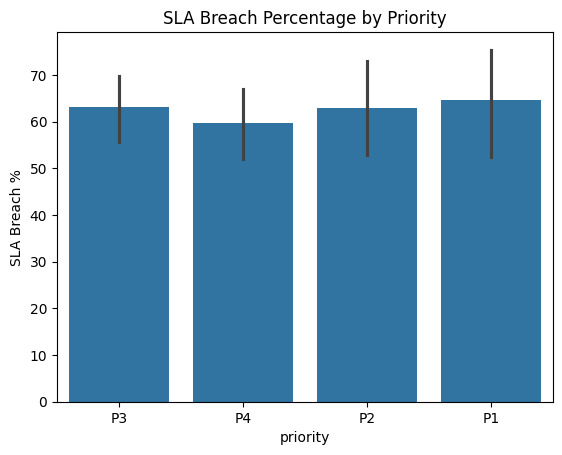

In [ ]:
sns.barplot(
    data=df,
    x="priority",
    y="sla_breached",
    estimator=lambda x: sum(x)/len(x)*100
)
plt.ylabel("SLA Breach %")
plt.title("SLA Breach Percentage by Priority")
plt.show()

In [ ]:
df.groupby("category")["sla_breached"].mean() * 100

,sla_breached
category,
Application,63.235294
Hardware,66.929134
Network,56.617647
Security,62.376238


In [ ]:
import sqlite3

conn = sqlite3.connect(":memory:")
df.to_sql("incidents", conn, index=False, if_exists="replace")

query = """
SELECT category,
       COUNT(*) AS total_incidents,
       SUM(sla_breached) AS breached_incidents
FROM incidents
GROUP BY category
"""

pd.read_sql(query, conn)

,category,total_incidents,breached_incidents
0,Application,136,86
1,Hardware,127,85
2,Network,136,77
3,Security,101,63
